In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
sns.set()
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
import sklearn.preprocessing as preproc 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv('EDA_dataset.csv')

In [60]:
df.head()

,Country_Name,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),...,Taxes_on_international_trade_(current_LCU),Trade_(%_of_GDP),Trade_in_services_(%_of_GDP),"Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)","Unemployment,_youth_total_(%_of_total_labor_force_ages_15-24)_(modeled_ILO_estimate)",Urban_population,Urban_population_(%_of_total_population),Urban_population_growth_(annual_%),"Vulnerable_employment,_total_(%_of_total_employment)_(modeled_ILO_estimate)","Wage_and_salaried_workers,_total_(%_of_total_employment)_(modeled_ILO_estimate)"
0,Africa Eastern and Southern,1999,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,...,2.359690e+11,45.424731,11.465418,7.015272,13.076964,111533909.0,28.489868,3.601474,73.421124,22.939684
1,Africa Eastern and Southern,2000,1.995793e+01,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,...,2.270450e+11,63.102906,10.532252,6.939536,13.045450,115551653.0,28.772780,3.602262,73.553800,22.871478
2,Africa Eastern and Southern,2001,1.998622e+01,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,...,2.460002e+11,64.036256,11.286972,6.850376,13.043432,119775502.0,29.071591,3.655377,73.588387,22.866942
3,Africa Eastern and Southern,2002,2.160150e+01,2.489774e+11,3.991570e+11,2.489774e+11,9.442113e+02,2.489774e+11,2.489774e+11,2.489774e+11,...,2.489774e+11,60.029466,11.426541,6.803537,13.065178,124227507.0,29.386190,3.716958,73.725292,22.590170
4,Africa Eastern and Southern,2003,2.254831e+01,2.652209e+11,4.191230e+11,2.323504e+00,9.661501e+02,2.652209e+11,2.652209e+11,2.652209e+11,...,2.652209e+11,57.388959,10.689284,6.741241,13.075810,128833965.0,29.698419,3.708082,73.950803,22.473167


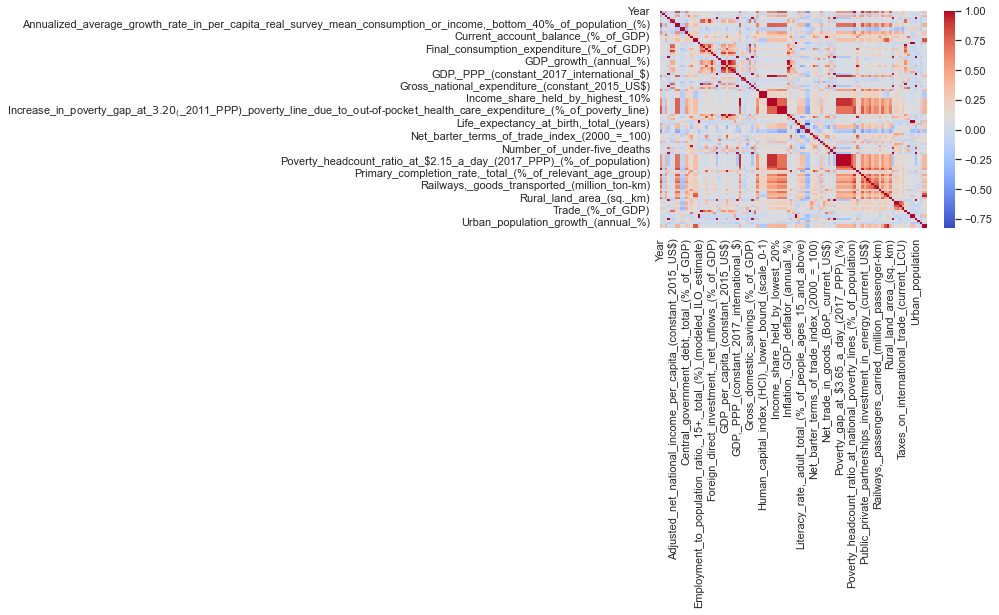

In [61]:
plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [62]:
#Create Correloation Matrix to express relationship between the variables

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [63]:
df.head()

,Country_Name,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),...,Taxes_on_international_trade_(current_LCU),Trade_(%_of_GDP),Trade_in_services_(%_of_GDP),"Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)","Unemployment,_youth_total_(%_of_total_labor_force_ages_15-24)_(modeled_ILO_estimate)",Urban_population,Urban_population_(%_of_total_population),Urban_population_growth_(annual_%),"Vulnerable_employment,_total_(%_of_total_employment)_(modeled_ILO_estimate)","Wage_and_salaried_workers,_total_(%_of_total_employment)_(modeled_ILO_estimate)"
0,Africa Eastern and Southern,1999,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,...,2.359690e+11,45.424731,11.465418,7.015272,13.076964,111533909.0,28.489868,3.601474,73.421124,22.939684
1,Africa Eastern and Southern,2000,1.995793e+01,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,...,2.270450e+11,63.102906,10.532252,6.939536,13.045450,115551653.0,28.772780,3.602262,73.553800,22.871478
2,Africa Eastern and Southern,2001,1.998622e+01,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,...,2.460002e+11,64.036256,11.286972,6.850376,13.043432,119775502.0,29.071591,3.655377,73.588387,22.866942
3,Africa Eastern and Southern,2002,2.160150e+01,2.489774e+11,3.991570e+11,2.489774e+11,9.442113e+02,2.489774e+11,2.489774e+11,2.489774e+11,...,2.489774e+11,60.029466,11.426541,6.803537,13.065178,124227507.0,29.386190,3.716958,73.725292,22.590170
4,Africa Eastern and Southern,2003,2.254831e+01,2.652209e+11,4.191230e+11,2.323504e+00,9.661501e+02,2.652209e+11,2.652209e+11,2.652209e+11,...,2.652209e+11,57.388959,10.689284,6.741241,13.075810,128833965.0,29.698419,3.708082,73.950803,22.473167


In [64]:
# Check the basic statistics of the numerical variables
print(df.describe())

              Year  Access_to_electricity_(%_of_population)  \
count  1166.000000                             1.166000e+03   
mean   2009.500000                             6.794129e+09   
std       6.347011                             4.062949e+10   
min    1999.000000                             6.431318e-01   
25%    2004.000000                             1.700827e+01   
50%    2009.500000                             3.505981e+01   
75%    2015.000000                             5.515618e+01   
max    2020.000000                             3.268200e+11   

       Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)  \
count                                       1.166000e+03                          
mean                                        2.321491e+11                          
std                                         2.446008e+11                          
min                                         2.613180e+01                          
25%              

In [65]:
# Check for missing values within columns
print(df.isnull().sum())

Country_Name                                                                       0
Year                                                                               0
Access_to_electricity_(%_of_population)                                            0
Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)           0
Adjusted_net_national_income_(constant_2015_US$)                                   0
                                                                                  ..
Urban_population                                                                   0
Urban_population_(%_of_total_population)                                           0
Urban_population_growth_(annual_%)                                                 0
Vulnerable_employment,_total_(%_of_total_employment)_(modeled_ILO_estimate)        0
Wage_and_salaried_workers,_total_(%_of_total_employment)_(modeled_ILO_estimate)    0
Length: 106, dtype: int64


In [66]:
#One hot encoding 

import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('EDA_dataset.csv')

# Select the categorical column to one-hot encode
cat_col = 'Country_Name'

# Perform one-hot encoding on the selected column using get_dummies()
one_hot_encoded = pd.get_dummies(df[cat_col], prefix=cat_col)

# Add the one-hot encoded columns to the original dataframe
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original categorical column
df.drop(cat_col, axis=1, inplace=True)

# Print the encoded dataframe
print(df.head())


   Year  Access_to_electricity_(%_of_population)  \
0  1999                             2.359690e+11   
1  2000                             1.995793e+01   
2  2001                             1.998622e+01   
3  2002                             2.160150e+01   
4  2003                             2.254831e+01   

   Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)  \
0                                       2.359690e+11                          
1                                       2.270450e+11                          
2                                       2.460002e+11                          
3                                       2.489774e+11                          
4                                       2.652209e+11                          

   Adjusted_net_national_income_(constant_2015_US$)  \
0                                      2.359690e+11   
1                                      2.270450e+11   
2                                      2.460002

In [67]:
#Apply pre-processing to data using Standard Scaler to make data comparative before applying PCA 
#to ensure that all input features have a similar scale and to avoid bias towards features with larger magnitudes
# if one feature is measured in the range of 0 to 1, and another feature is measured in the range of 0 to 10, then
#the latter feature will have a much larger influence on the outcome of a machine learning model

#Standard Scaling


scaler1 = preproc.StandardScaler()
d = scaler1.fit_transform(df)
X_scaled_stan = pd.DataFrame(d, columns=df.columns)

#all standard deviations are 1
X_scaled_stan.head()

,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),CPIA_trade_rating_(1=low_to_6=high),...,Country_Name_Sub-Saharan Africa,Country_Name_Sub-Saharan Africa (IDA & IBRD countries),Country_Name_Sub-Saharan Africa (excluding high income),Country_Name_Sudan,Country_Name_Tanzania,Country_Name_Togo,Country_Name_Uganda,Country_Name_World,Country_Name_Zambia,Country_Name_Zimbabwe
0,-1.655032,5.643025,0.015624,-0.144068,0.947423,0.978781,-1.023702,-1.023702,0.551408,0.553101,...,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675
1,-1.497410,-0.167293,-0.020876,-0.145213,0.892079,0.922357,-1.082257,-1.082257,0.501541,0.503223,...,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675
2,-1.339788,-0.167293,0.056651,-0.142781,1.009632,1.042205,-0.957882,-0.957882,0.607461,0.609168,...,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675
3,-1.182166,-0.167293,0.068828,-0.123130,1.028096,-0.513184,-0.938346,-0.938346,0.624098,0.625808,...,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675
4,-1.024544,-0.167293,0.135265,-0.120569,-0.515978,-0.513184,-0.831763,-0.831763,0.714866,0.716597,...,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675,-0.138675


In [68]:
#Standard Scaled Data = df1

df1 = X_scaled_stan.copy()

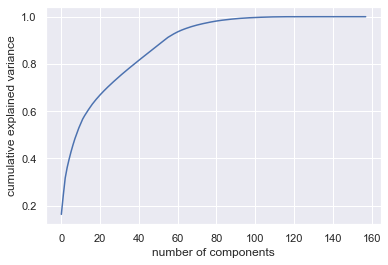

In [85]:
# Principle Component Analysis

#Fit PCA using Standard Scaled Data (df1)

pca1 = PCA().fit(df1)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [70]:
from sklearn.decomposition import PCA
import numpy as np

# assume X is your data matrix
pca1 = PCA(n_components=100)
X_pca = pca1.fit_transform(df1)

# Get the percentage of variance explained by each principal component
variance_ratios = pca1.explained_variance_ratio_

# Print the variance ratios
for i, ratio in enumerate(variance_ratios):
    print("PC{} explains {:.2f}% of the variance".format(i+1, ratio*100))

PC1 explains 16.26% of the variance
PC2 explains 8.04% of the variance
PC3 explains 7.38% of the variance
PC4 explains 4.41% of the variance
PC5 explains 3.51% of the variance
PC6 explains 3.20% of the variance
PC7 explains 2.87% of the variance
PC8 explains 2.64% of the variance
PC9 explains 2.26% of the variance
PC10 explains 2.25% of the variance
PC11 explains 1.95% of the variance
PC12 explains 1.86% of the variance
PC13 explains 1.44% of the variance
PC14 explains 1.32% of the variance
PC15 explains 1.25% of the variance
PC16 explains 1.22% of the variance
PC17 explains 1.14% of the variance
PC18 explains 1.05% of the variance
PC19 explains 0.99% of the variance
PC20 explains 0.96% of the variance
PC21 explains 0.90% of the variance
PC22 explains 0.88% of the variance
PC23 explains 0.84% of the variance
PC24 explains 0.83% of the variance
PC25 explains 0.79% of the variance
PC26 explains 0.78% of the variance
PC27 explains 0.76% of the variance
PC28 explains 0.76% of the variance


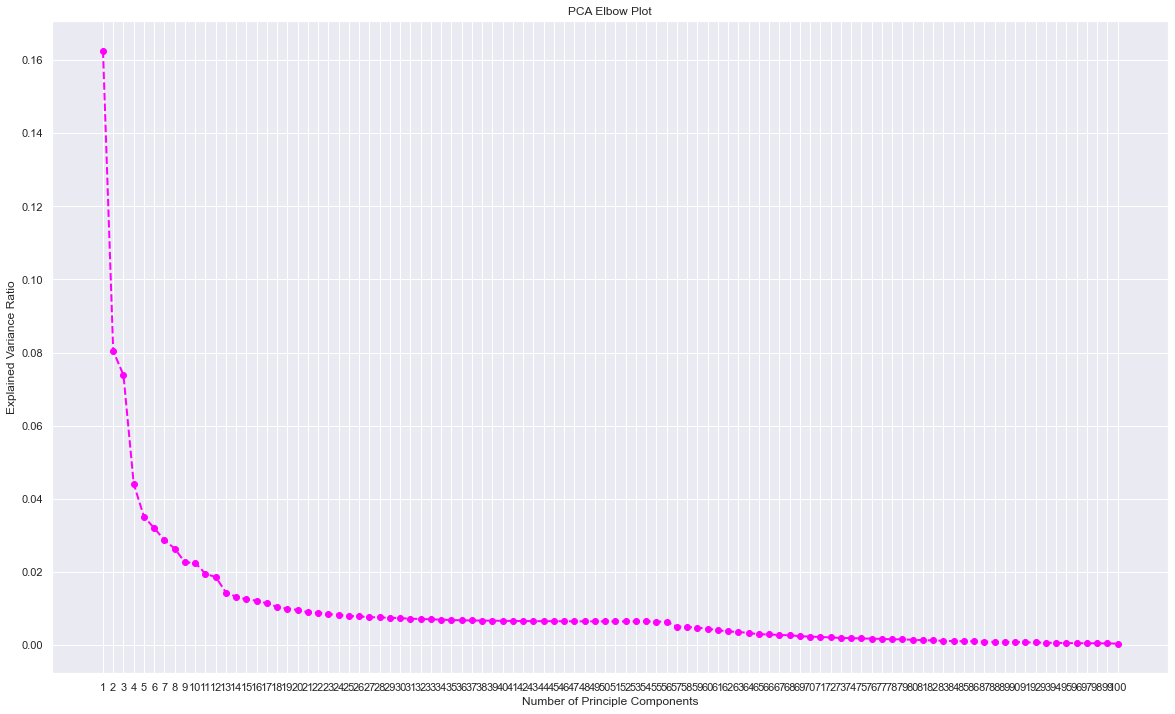

In [84]:
#Plot the Explained Variance Ratio - we can see from the below that there are 17 principle components
# Using Zero value df

plt.figure(figsize=(20,12))
sns.set(style='darkgrid')

plt.plot(range(1, len(pca1.explained_variance_ratio_) +1),
         
         pca1.explained_variance_ratio_, marker='o', linestyle='--', color='magenta', linewidth=2)
plt.xlabel('Number of Principle Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Plot')
plt.xticks(range(1, len(pca1.explained_variance_ratio_) +1))
plt.show();

In [86]:
#Testing Min-Max scaling 


from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
d = scaler2.fit_transform(df)
X_scaled_MM = pd.DataFrame(d, columns=df.columns)

#all values are now between 0 and 1
X_scaled_MM.head()


,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),CPIA_trade_rating_(1=low_to_6=high),...,Country_Name_Sub-Saharan Africa,Country_Name_Sub-Saharan Africa (IDA & IBRD countries),Country_Name_Sub-Saharan Africa (excluding high income),Country_Name_Sudan,Country_Name_Tanzania,Country_Name_Togo,Country_Name_Uganda,Country_Name_World,Country_Name_Zambia,Country_Name_Zimbabwe
0,0.000000,7.220153e-01,0.323133,0.003434,3.231329e-01,3.231329e-01,0.323133,0.323133,0.323133,0.323133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.047619,5.909919e-11,0.310912,0.003304,3.109125e-01,3.109125e-01,0.310912,0.310912,0.310912,0.310912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095238,5.918576e-11,0.336869,0.003579,3.368694e-01,3.368694e-01,0.336869,0.336869,0.336869,0.336869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.142857,6.412818e-11,0.340946,0.005804,3.409464e-01,1.939876e-09,0.340946,0.340946,0.340946,0.340946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.190476,6.702520e-11,0.363190,0.006094,1.275148e-09,1.969919e-09,0.363190,0.363190,0.363190,0.363190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#Min Max Scaled Data = df2

df2_pca1 = X_scaled_MM.copy()

Text(0, 0.5, 'cumulative explained variance')

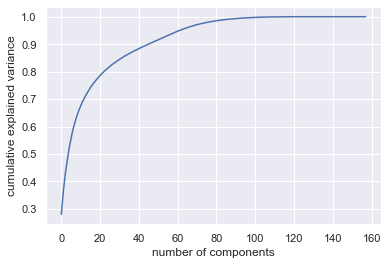

In [88]:
# Principle Component Analysis


#Fit PCA using Min/Max Scaled Data (df2)


pca2 = PCA().fit(df2_pca1)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [90]:
from sklearn.decomposition import PCA
import numpy as np

# assume X is your data matrix
pca2 = PCA(n_components=100)
X_pca_2 = pca2.fit_transform(df2_pca1)

# Get the percentage of variance explained by each principal component
variance_ratios = pca2.explained_variance_ratio_

# Print the variance ratios
for i, ratio in enumerate(variance_ratios):
    print("PC{} explains {:.2f}% of the variance".format(i+1, ratio*100))

PC1 explains 28.00% of the variance
PC2 explains 8.14% of the variance
PC3 explains 6.45% of the variance
PC4 explains 4.82% of the variance
PC5 explains 4.54% of the variance
PC6 explains 3.66% of the variance
PC7 explains 3.30% of the variance
PC8 explains 2.61% of the variance
PC9 explains 2.32% of the variance
PC10 explains 1.97% of the variance
PC11 explains 1.76% of the variance
PC12 explains 1.60% of the variance
PC13 explains 1.37% of the variance
PC14 explains 1.29% of the variance
PC15 explains 1.19% of the variance
PC16 explains 1.18% of the variance
PC17 explains 1.03% of the variance
PC18 explains 0.88% of the variance
PC19 explains 0.87% of the variance
PC20 explains 0.81% of the variance
PC21 explains 0.80% of the variance
PC22 explains 0.74% of the variance
PC23 explains 0.69% of the variance
PC24 explains 0.66% of the variance
PC25 explains 0.60% of the variance
PC26 explains 0.60% of the variance
PC27 explains 0.56% of the variance
PC28 explains 0.55% of the variance


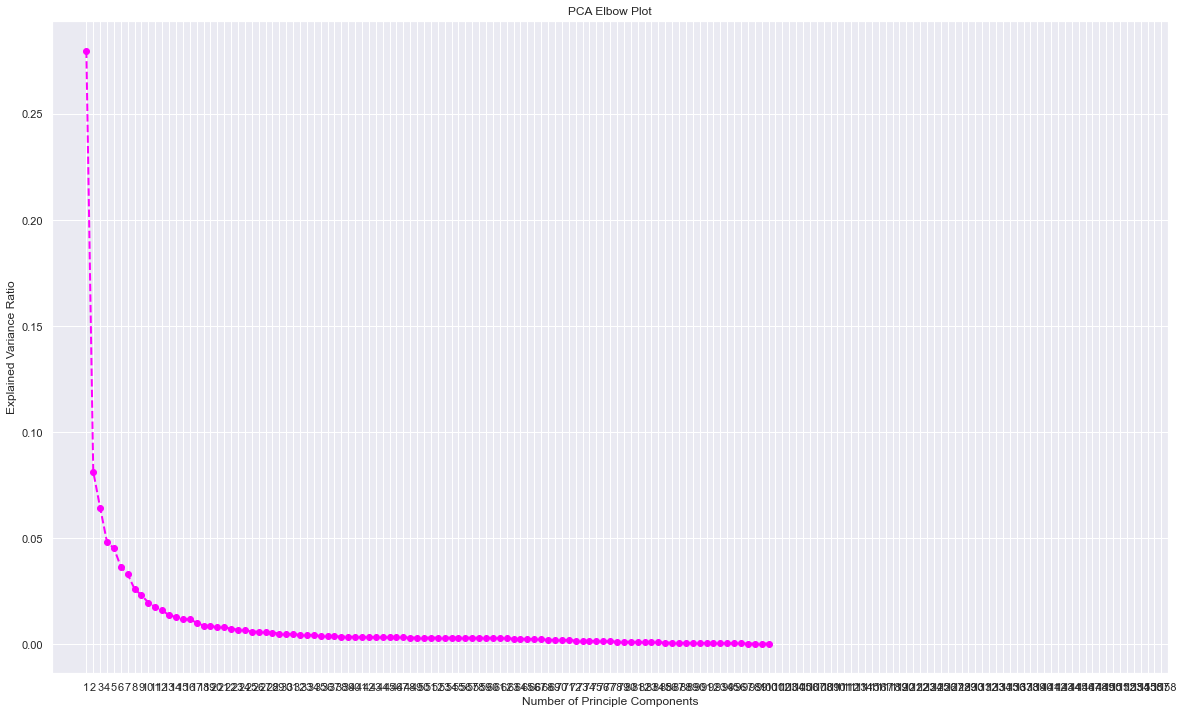

In [97]:
plt.figure(figsize=(20,12))
sns.set(style='darkgrid')

plt.plot(range(1, len(pca2.explained_variance_ratio_) +1),
         
         pca2.explained_variance_ratio_, marker='o', linestyle='--', color='magenta', linewidth=2)
plt.xlabel('Number of Principle Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Plot')
plt.xticks(range(1, len(pca1.explained_variance_ratio_) +1))
plt.show();

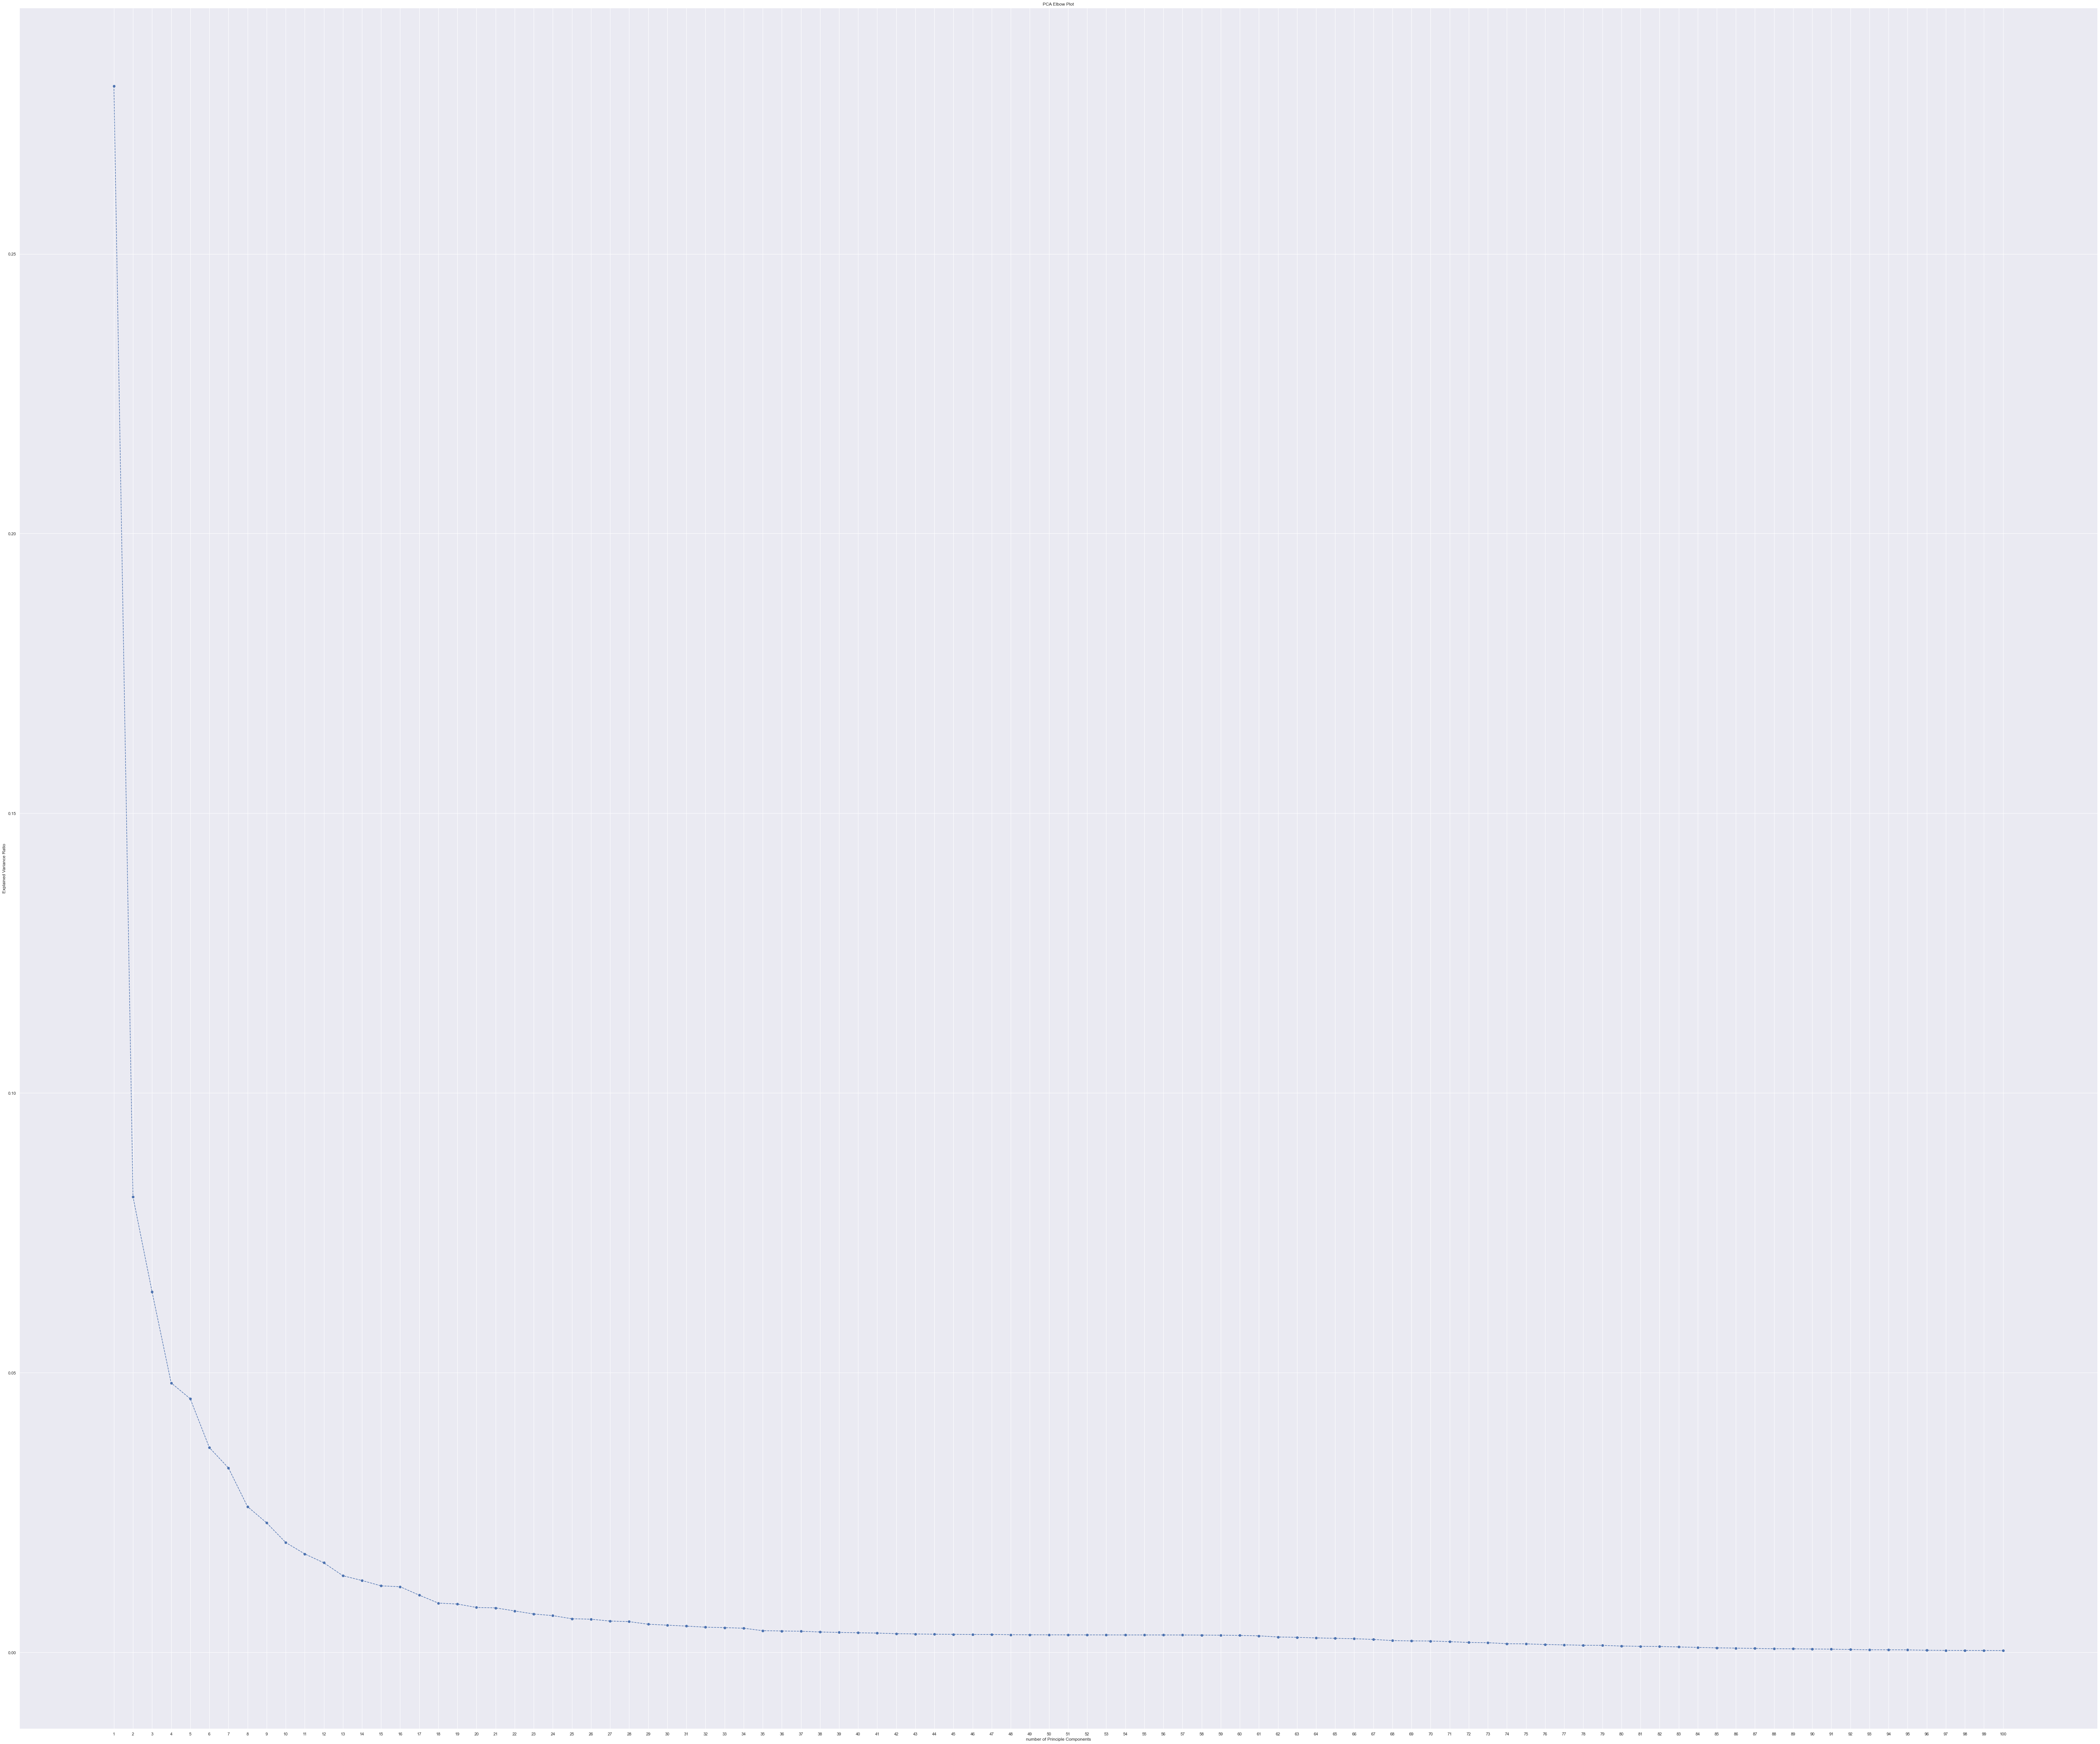

In [26]:
#Plot the Explained Variance Ratio - we can see from the below that there are 17 principle components
# Using Zero value df

plt.figure(figsize=(100,85))
sns.set(style='darkgrid')

plt.plot(range(1, len(pca2.explained_variance_ratio_) +1),
         pca2.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('number of Principle Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Plot')
plt.xticks(range(1, len(pca2.explained_variance_ratio_) +1))
plt.show();






In [98]:
#Apply pre-processing to data using Robust scaler to make data comparative before applying PCA 


# Robust Scaling


from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
d = scaler.fit_transform(df)
X_scaled_rob = pd.DataFrame(d, columns=df.columns)

#scaled using robust scaling
X_scaled_rob.head()

,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),CPIA_trade_rating_(1=low_to_6=high),...,Country_Name_Sub-Saharan Africa,Country_Name_Sub-Saharan Africa (IDA & IBRD countries),Country_Name_Sub-Saharan Africa (excluding high income),Country_Name_Sudan,Country_Name_Tanzania,Country_Name_Togo,Country_Name_Uganda,Country_Name_World,Country_Name_Zambia,Country_Name_Zimbabwe
0,-0.954545,6.185635e+09,0.000000,0.748170,7.601981e+09,2.600571e+07,-0.564733,-0.564733,0.947753,0.947753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.863636,-3.958769e-01,-0.021219,0.716468,7.314485e+09,2.502221e+07,-0.604307,-0.604307,0.911910,0.911910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.772727,-3.951353e-01,0.023852,0.783805,7.925145e+09,2.711122e+07,-0.520249,-0.520249,0.988042,0.988042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.681818,-3.527927e-01,0.030931,1.327885,8.021059e+09,-4.284748e-02,-0.507047,-0.507047,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.590909,-3.279734e-01,0.069554,1.398813,-7.166672e-02,-4.042965e-02,-0.435013,-0.435013,1.065241,1.065241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#Robust Scaled Data = df3

df3 = X_scaled_rob.copy()

Text(0, 0.5, 'cumulative explained variance')

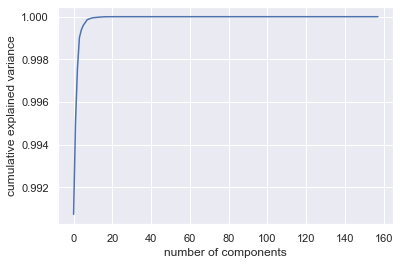

In [100]:
# Principle Component Analysis


#Fit PCA using Robust Scaled Data (df3)


pca3 = PCA().fit(df3)
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [101]:
from sklearn.decomposition import PCA
import numpy as np

# assume X is your data matrix
pca3 = PCA(n_components=25)
X_pca_3 = pca3.fit_transform(df3)

# Get the percentage of variance explained by each principal component
variance_ratios = pca3.explained_variance_ratio_

# Print the variance ratios
for i, ratio in enumerate(variance_ratios):
    print("PC{} explains {:.2f}% of the variance".format(i+1, ratio*100))

PC1 explains 99.07% of the variance
PC2 explains 0.43% of the variance
PC3 explains 0.25% of the variance
PC4 explains 0.14% of the variance
PC5 explains 0.04% of the variance
PC6 explains 0.02% of the variance
PC7 explains 0.01% of the variance
PC8 explains 0.01% of the variance
PC9 explains 0.00% of the variance
PC10 explains 0.00% of the variance
PC11 explains 0.00% of the variance
PC12 explains 0.00% of the variance
PC13 explains 0.00% of the variance
PC14 explains 0.00% of the variance
PC15 explains 0.00% of the variance
PC16 explains 0.00% of the variance
PC17 explains 0.00% of the variance
PC18 explains 0.00% of the variance
PC19 explains 0.00% of the variance
PC20 explains 0.00% of the variance
PC21 explains 0.00% of the variance
PC22 explains 0.00% of the variance
PC23 explains 0.00% of the variance
PC24 explains 0.00% of the variance
PC25 explains 0.00% of the variance


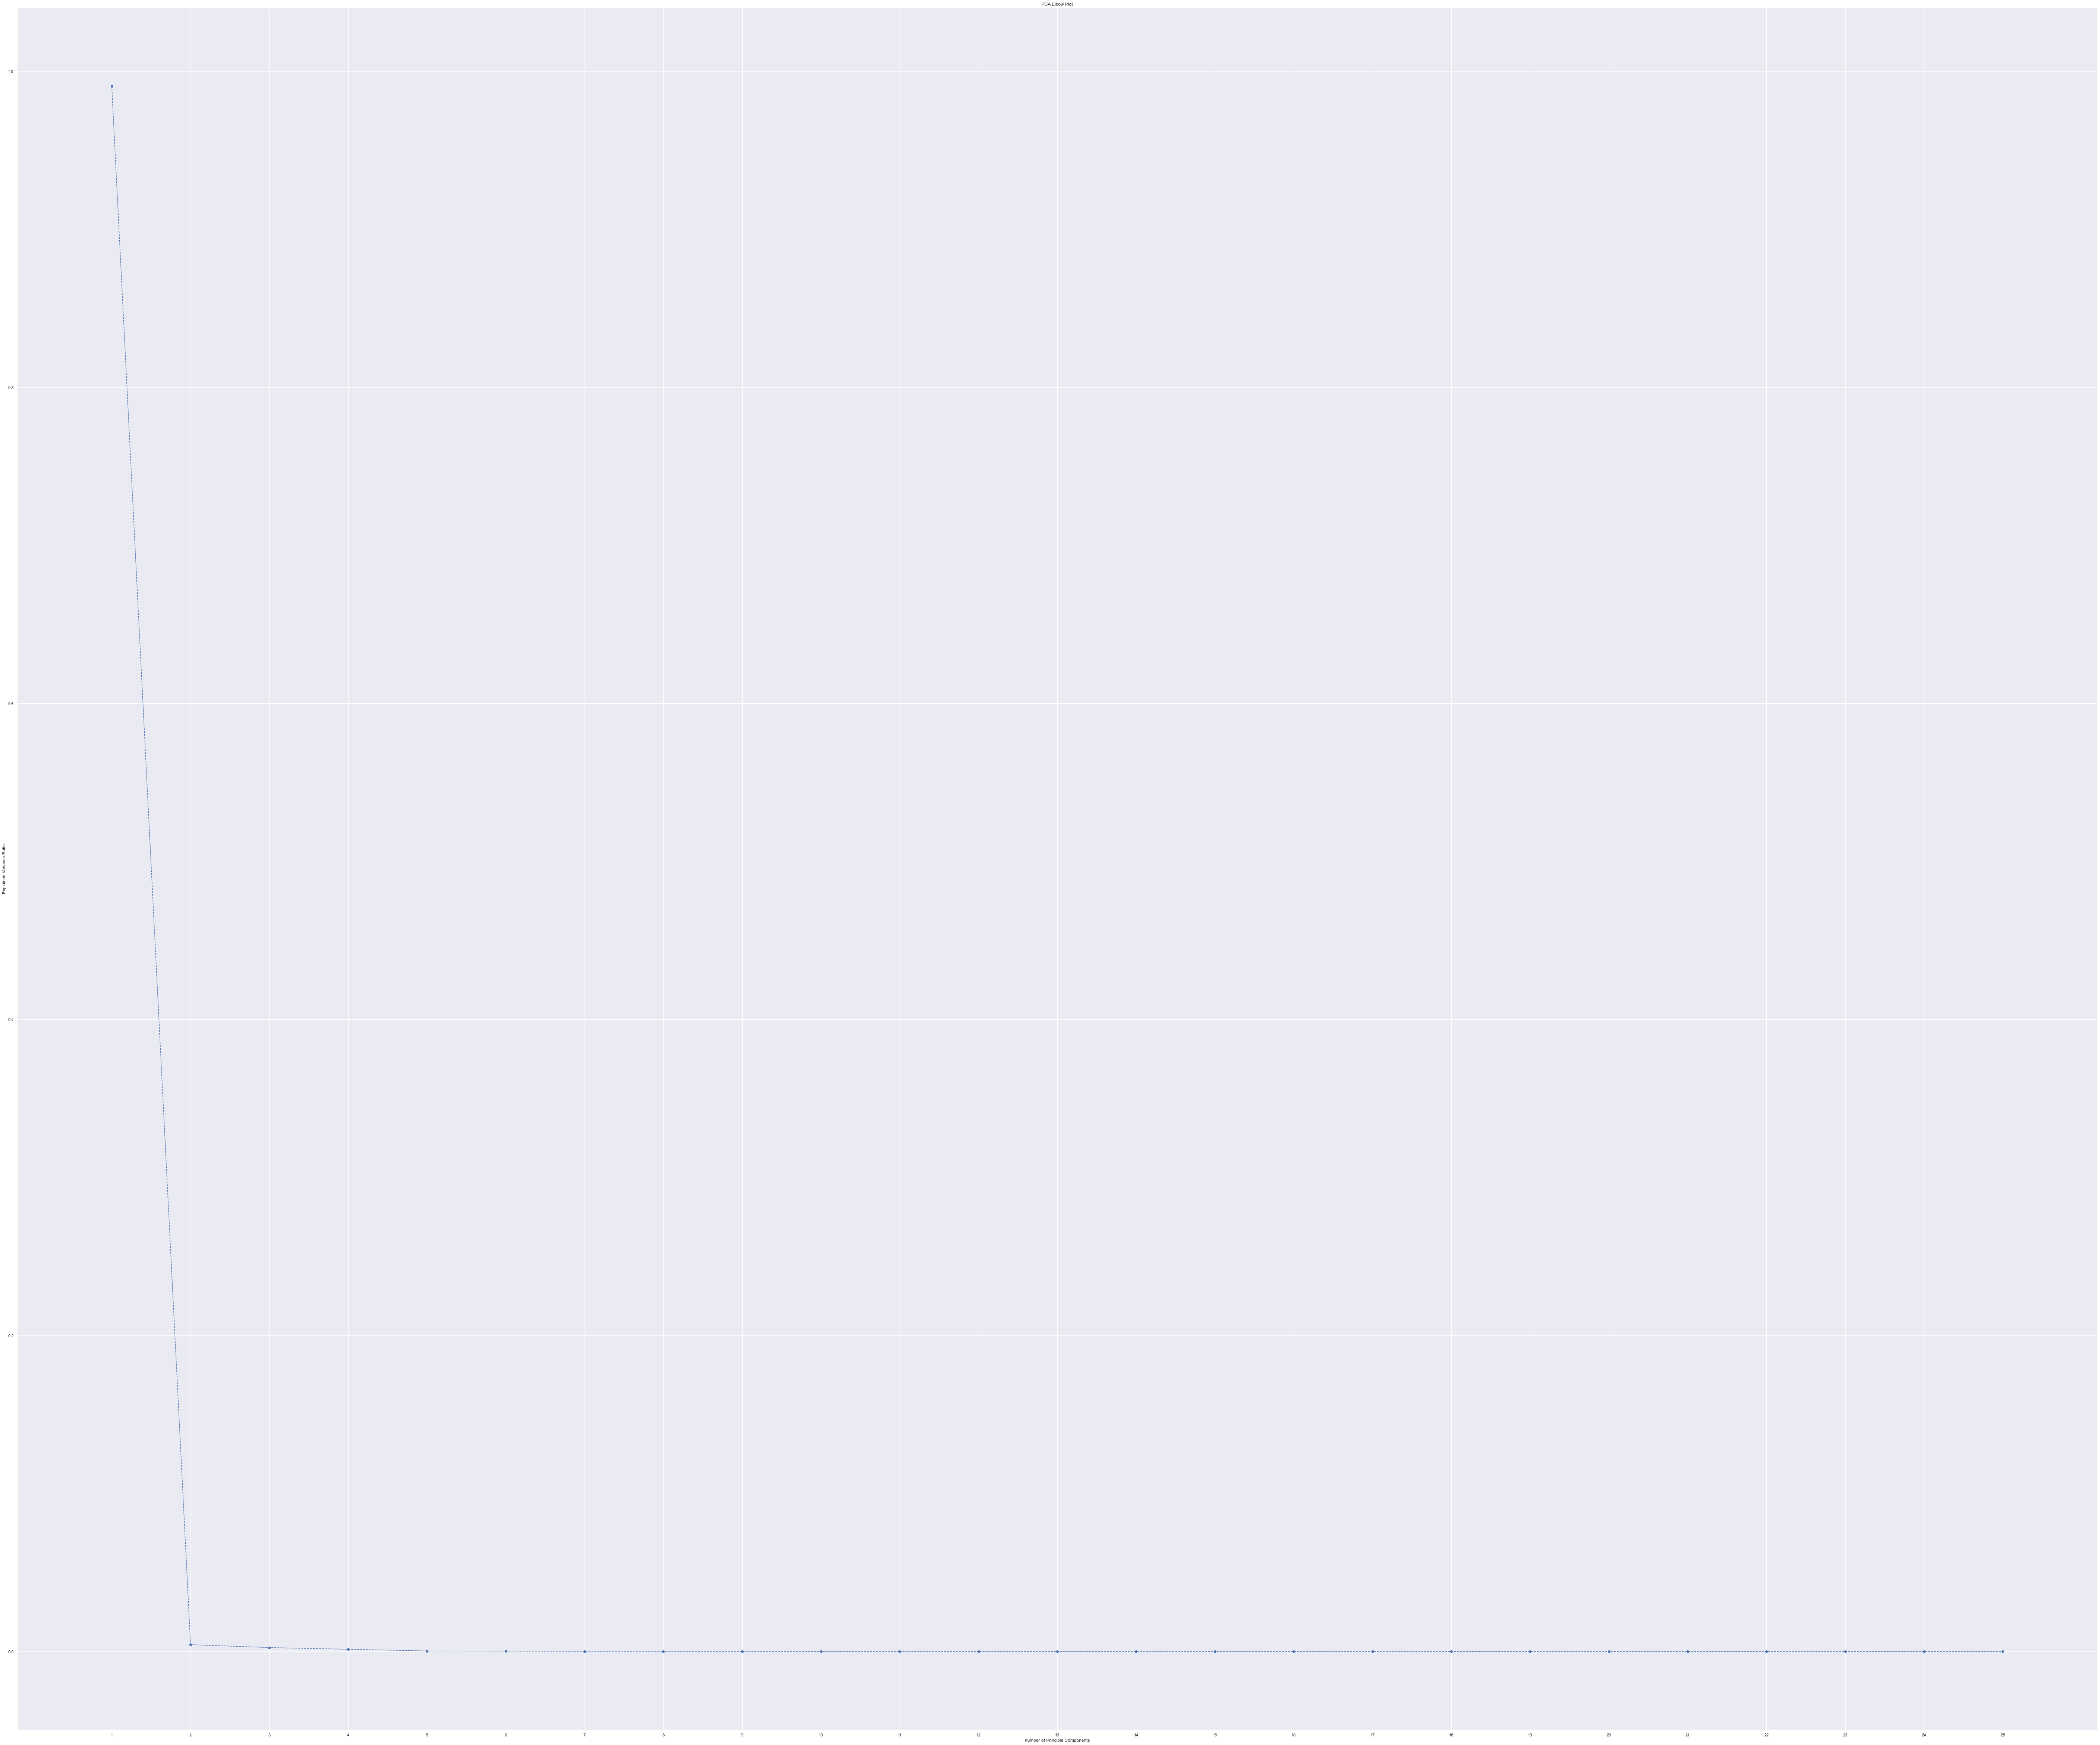

In [95]:
#Plot the Explained Variance Ratio - we can see from the below that there are 17 principle components
# Using Zero value df

plt.figure(figsize=(100,85))
sns.set(style='darkgrid')

plt.plot(range(1, len(pca3.explained_variance_ratio_) +1),
         pca3.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('number of Principle Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Plot')
plt.xticks(range(1, len(pca3.explained_variance_ratio_) +1))
plt.show();

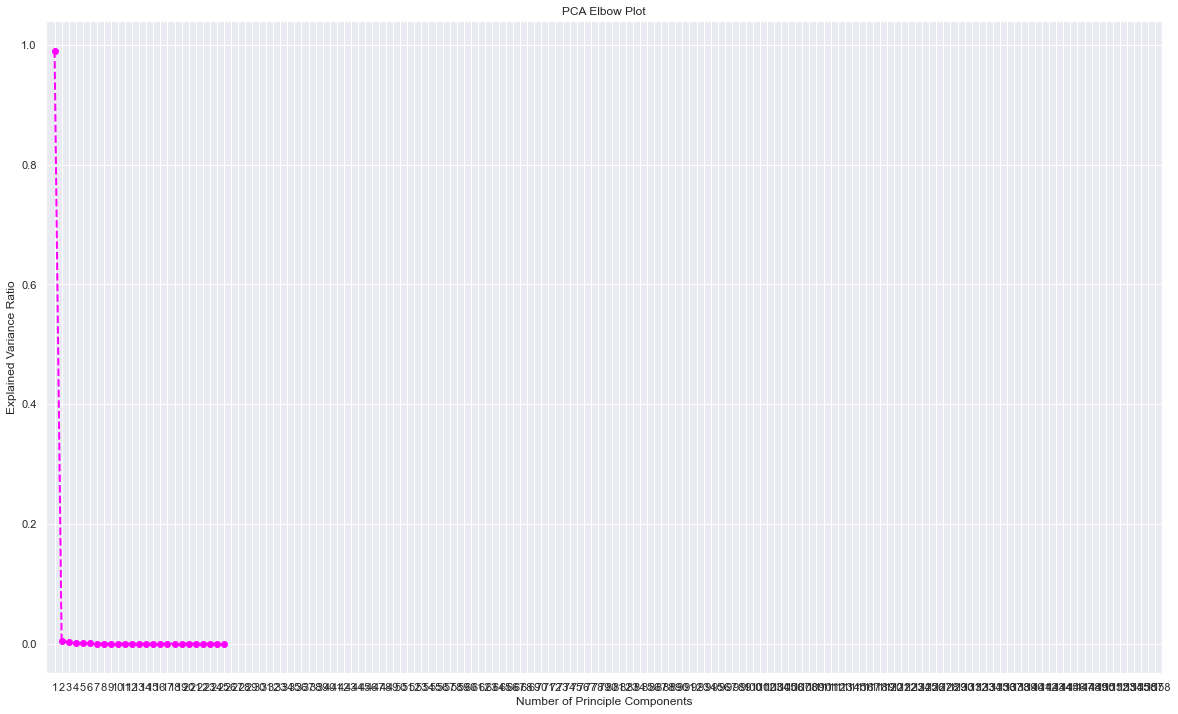

In [102]:
plt.figure(figsize=(20,12))
sns.set(style='darkgrid')

plt.plot(range(1, len(pca3.explained_variance_ratio_) +1),
         
         pca3.explained_variance_ratio_, marker='o', linestyle='--', color='magenta', linewidth=2)
plt.xlabel('Number of Principle Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Plot')
plt.xticks(range(1, len(pca1.explained_variance_ratio_) +1))
plt.show();

In [34]:
#Fit our defined number of components into a new model by specifying the number we need to include all % of variance
#In this first case we will use the number 18 and our first edited data frame of Zero Positive values

pca4 = PCA(n_components=4)
projected = pca4.fit_transform(df3)

In [35]:
projected.shape

(1166, 4)

In [36]:
df3_pca1 = pd.DataFrame(projected, columns=['C1','C2','C3','C4'])
df3_pca1

,C1,C2,C3,C4
0,9.026157e+11,-1.499234e+10,4.476691e+10,-1.148355e+10
1,8.566197e+11,-3.692729e+10,-5.026617e+09,-7.534094e+09
2,9.536705e+11,-3.792139e+10,-5.237724e+09,-8.733387e+09
3,9.689141e+11,-3.807754e+10,-5.270882e+09,-8.921764e+09
4,1.052079e+12,-3.928185e+10,-5.452575e+09,-1.060110e+10
...,...,...,...,...
1161,-3.058526e+11,-2.493212e+10,-2.319841e+09,6.750323e+09
1162,-3.058526e+11,-2.493153e+10,-2.318635e+09,6.749776e+09
1163,-3.058525e+11,-2.492835e+10,-2.312180e+09,6.746851e+09
1164,-3.058520e+11,-2.491372e+10,-2.282480e+09,6.733392e+09


In [38]:
df3_pca1.describe()

,C1,C2,C3,C4
count,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03
mean,-1.947262e-05,4.580254e-08,-4.056796e-06,-1.807565e-06
std,7.751530e+11,5.133444e+10,3.897946e+10,2.950830e+10
min,-3.058889e+11,-6.007031e+10,-1.217549e+11,-9.791668e+10
25%,-3.058556e+11,-2.501985e+10,-5.664918e+09,-1.209118e+10
50%,-3.058244e+11,-2.487293e+10,-2.497968e+09,6.831042e+09
75%,-3.055511e+11,2.063924e+10,-2.319841e+09,6.856850e+09
max,3.439704e+12,3.187337e+11,1.631112e+11,1.625299e+11


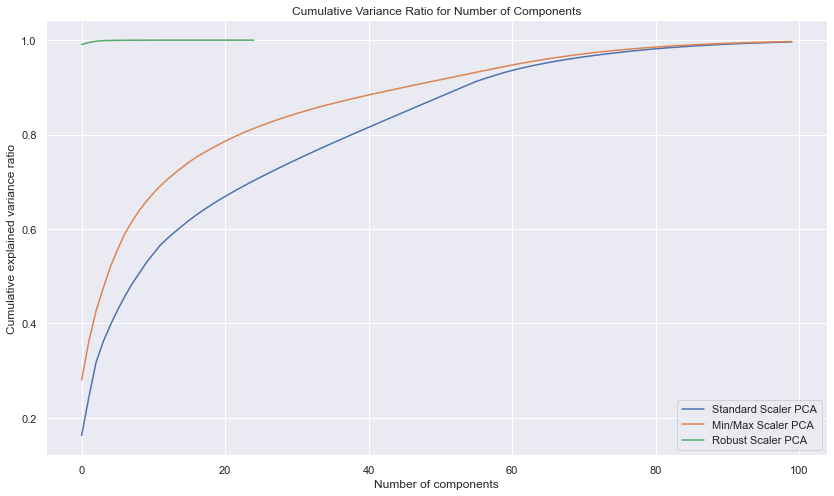

In [40]:
import matplotlib.pyplot as plt

# Create a new figure with size (10, 6)
plt.figure(figsize=(14, 8))

# Plot cumulative explained variance ratio for each PCA
plt.plot(np.cumsum(pca1.explained_variance_ratio_), label='Standard Scaler PCA')
plt.plot(np.cumsum(pca2.explained_variance_ratio_), label='Min/Max Scaler PCA')
plt.plot(np.cumsum(pca3.explained_variance_ratio_), label='Robust Scaler PCA')

# Add axis labels and title
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Number of components')
plt.title('Cumulative Variance Ratio for Number of Components')

# Add legend
plt.legend();

In [41]:
print("PCA components:\n{}".format(pca3.components_))

PCA components:
[[ 7.17204074e-14  4.07107588e-05  6.22903427e-14 ...  5.55471855e-14
  -9.60763595e-15 -9.60409014e-15]
 [ 1.76560599e-12  2.06242472e-03  2.28164709e-12 ... -3.03792176e-13
   4.50645720e-14 -7.50745029e-15]
 [ 2.26004635e-12  1.86730407e-03  5.20550270e-12 ...  3.68671639e-14
  -4.22090024e-14  4.28475377e-13]
 ...
 [ 1.23990304e-08  4.92905904e-04  2.15898586e-09 ...  3.17975325e-09
  -7.93422733e-10 -7.24937913e-10]
 [ 8.36170948e-09 -4.29933080e-04  1.33273043e-08 ...  3.61748036e-09
  -6.36306421e-10 -3.23351520e-09]
 [ 5.96141408e-05  5.91707312e-09  6.56335784e-05 ...  1.13656487e-04
  -4.94903515e-06 -2.00924041e-06]]


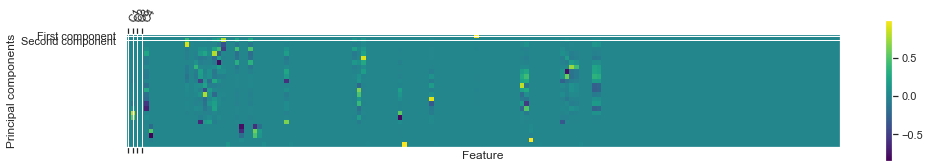

In [42]:
feature_names = ['C1','C2','C3','C4']

plt.matshow(pca3.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [43]:
df3_pca1.to_csv('WDI_OHE_PCA.csv', index=False)

In [45]:
##R-Squared Evaluation

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('WDI_OHE_PCA.csv')


# Split the data into features (X) and target variable (y)
X = df.drop(['C1'], axis=1)  # Features
y = df['C1']  # Target variable


# Create a random forest regressor
rf_regressor_pca = RandomForestRegressor(n_estimators=5, random_state=1)

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 23  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the R-squared score on the testing data
    r2 = r2_score(y_test, y_pred)

    # Print the R-squared score
    print(f"R-squared score for {int(split*100)}% test set size: {r2:.2f}")

R-squared score for 10% test set size: 0.97
R-squared score for 20% test set size: 0.97
R-squared score for 30% test set size: 0.89


In [44]:


# Refitting our dimensionally reduced code after PCA back into one of the sucessful models (Random Forest Regressor) 
# and re-testing RMSE scores


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('WDI_OHE_PCA.csv')


# Split the data into features (X) and target variable (y)
X = df.drop(['C1'], axis=1)  # Features
y = df['C1']  # Target variable


# Create a random forest regressor
rf_regressor_pca = RandomForestRegressor(n_estimators=5, random_state=1)

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 42  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=split, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor_pca.fit(X_train_pca, y_train)

    # Make predictions on the testing data
    y_pred_pca = rf_regressor_pca.predict(X_test_pca)

    # Calculate the RMSE on the testing data
    rmse_pca = mean_squared_error(y_test, y_pred_pca, squared=False)

    # Print the RMSE
    print(f"RMSE for {int(split*100)}% test set size after PCA: {rmse_pca}")

RMSE for 10% test set size after PCA: 271059275748.23135
RMSE for 20% test set size after PCA: 227587799489.90076
RMSE for 30% test set size after PCA: 196058517144.14267


In [48]:
#Mean Absolute Error Evaluation

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('WDI_OHE_PCA.csv')

# Split the data into features (X) and target variable (y)
X = df.drop(['C1'], axis=1)  # Features
y = df['C1']  # Target variable

# Create a random forest regressor
rf_regressor_pca = RandomForestRegressor(n_estimators=5, random_state=1)

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 23  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the MAE on the testing data
    mae = mean_absolute_error(y_test, y_pred)

    # Print the MAE
    print(f"MAE for {int(split*100)}% test set size: {mae:.2f}")

MAE for 10% test set size: 18027533670.29
MAE for 20% test set size: 19889070571.63
MAE for 30% test set size: 29339651207.76


In [50]:
#Mean Squared Error Evaluation

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('WDI_OHE_PCA.csv')

# Split the data into features (X) and target variable (y)
X = df.drop(['C1'], axis=1)  # Features
y = df['C1']  # Target variable

# Create a random forest regressor
rf_regressor_pca = RandomForestRegressor(n_estimators=5, random_state=1)

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 23  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the MSE on the testing data
    mse = mean_squared_error(y_test, y_pred)

    # Print the MSE
    print(f"MSE for {int(split*100)}% test set size: {mse:.2f}")

MSE for 10% test set size: 12874409498319859482624.00
MSE for 20% test set size: 15036915542638897135616.00
MSE for 30% test set size: 67132944102886790397952.00
